<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2005%20-%20IVP%20Consistent%20Convergence%20Stability/504_Futher%20Notes%20on%20Stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Further Notes on Stability

In this notebook I will discuss stability for a multistep methods.

In [6]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/1BviXbmtXo4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Definition of Stability
The stability of a numerical method is not as tangable as consistency and convergence but when you see an unstable solution it is obvious.

To determine the stabilty of a multistep method we need three definitions:


### Definition: Characteristic Equation
Associated with the difference equation 
\begin{equation} w_0=\alpha \ \ \ w_1=\alpha_1 \ \ \ ... \ \ \ w_{m-1}=\alpha_{m-1} \end{equation}
\begin{equation}w_{i+1} = a_{m-1}w_{i}+a_{m-2}w_{i-1}+...+a_{0}w_{i+1-m} +hF(t_i,h,w_{i+1},...,w_{i+1-m}),\end{equation}
is the __characteristic equation__ given by
\begin{equation}\lambda^{m} - a_{m-1}\lambda^{m-1}-a_{m-2}\lambda^{m-2}-...-a_{0} =0. \end{equation}

### Definition: Root Condition 

Let $\lambda_1,...,\lambda_m$ denote the roots of the that characteristic equation
\begin{equation}\lambda^{m} - a_{m-1}\lambda^{m-1}-a_{m-2}\lambda^{m-2}-...-a_{0} =0 \end{equation}
associated with the multi-step difference method
\begin{equation} w_0=\alpha \ \ \ w_1=\alpha_1 \ \ \ ... \ \ \ w_{m-1}=\alpha_{m-1} \end{equation}
\begin{equation} w_{i+1} = a_{m-1}w_{i}+a_{m-2}w_{i-1}+...+a_{0}w_{i+1-m} +hF(t_i,h,w_{i+1},...,w_{i+1-m}),\end{equation}
If $|\lambda_{i}|\leq 1$ for each $i=1,...,m$ and all roots with absolute value 1
are simple roots then the difference equation is said to satisfy the __root condition__.

### Definition: Stability
1. Methods that satisfy the root condition and have $\lambda=1$ as the only root 
of the characteristic equation of magnitude one and all other roots are 0 are called __strongly stable__;
2. Methods that satisfy the root condition and have more than one distinct root
with magnitude one are called __weakly stable__;
3. Methods that do not satisfy the root condition are called __unstable__.

All one step methods, Adams-Bashforth and Adams-Moulton methods are all stongly stable.

In [7]:
## LIBRARIES

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

## Initial Value Problem
To illustrate stability of a method we will use the given the non-linear Initial Value Problem, 
\begin{equation} y^{'}=-0.5y^2, \ \ y(0)=3, \ \ \  0\leq t \leq 10.\end{equation}
For the methods we will use $N=100$, which give $h=\frac{1}{10}$ and 
\begin{equation}t_i=0+0.1 i,\end{equation}
where $i=0,...100.$

In [8]:
tau=-0.5
N=100
h=1/N

time=np.linspace(0,10,N)
## INITIAL CONDITIONS
NS=np.ones(N)
NS1=np.ones(N)
NS2=np.ones(N)

We will apply the three following methods to the above initial value problem:
1. A stable method,
 \begin{equation} w_{i+1}=w_{i}+\frac{h}{2}[3(-0.5w^2_{i})-(-0.5w^2_{i-1})], \end{equation}
    with the characteristic equation
\begin{equation}\lambda^2=\lambda,\end{equation}
    which satisfies the root condition $\lambda=1$ and $\lambda=0$, hence it is strongly stable.
2. A weakly stable method
\begin{equation} w_{i+1}=1.0w_{i-2}+h[3(-0.5w^2_{i})-(-0.5w^2_{i-1})], \end{equation}
    with the characteristic equation
  \begin{equation}\lambda^4=1,\end{equation}
    which does  satisfies the root condition  with roots $\lambda=\pm1$ and $\lambda=\pm \sqrt{-1}$ but as it has more than one root $|\lambda|=1$ it is weakly stable.
3. An unstable method
 \begin{equation} w_{i+1}=1.01w_{i}+\frac{h}{2}[3(-0.5w^2_{i})-(-0.5w^2_{i-1})] \end{equation}
    with the characteristic equation
   \begin{equation}\lambda^2=1.01\lambda,\end{equation}
    which does not satisfies the root condition, as it has the roots $\lambda=1.01$ and $\lambda=0$, hence it is unstable.

In [9]:
# INITIAL SOLUTIONS ONE STEP METHOD
for i in range (0,3):
    NS[i+1]=NS[i]+h*tau*(NS[i]*NS[i])
    NS1[i+1]=NS[i+1]#+h*tau*(-NS[i-1]*NS[i-1])
    NS2[i+1]=NS[i+1]#+h*tau*(-NS[i-1]*NS[i-1])
    

# MULTISTEP METHODS
for i in range (3,N-1):
    NS[i+1]=NS[i]+h/2*tau*(3*NS[i]*NS[i]-NS[i-1]*NS[i-1])
    NS1[i+1]=NS1[i-2]+h*tau*(3*NS1[i]*NS1[i]-NS1[i-1]*NS1[i-1])
    NS2[i+1]=1.01*NS2[i]+h/2*tau*(3*NS2[i]*NS2[i]-NS2[i-1]*NS2[i-1])
                                                                 

## Results
The below plot shows the solutions for the stable method (left), the weakly stable method (middle) and unstable method (right).
1. The stable results show a monotonically decreasing function.  
2. The weakly stable results have a oscilation which is a by product of the method being unstable that is not part of the exact solution.
3. The unstable method is nothing like stable solution it is monotonically increasing after the initial conditons. 

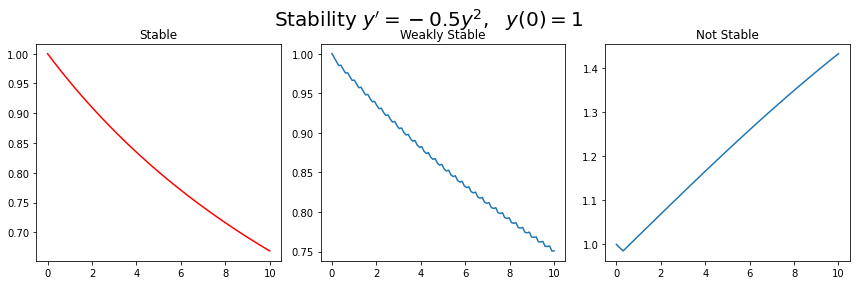

In [10]:
fig = plt.figure(figsize=(12,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(time,NS,color='red')
#ax.legend(loc='best')
plt.title('Stable')
ax = fig.add_subplot(1,3,2)
plt.plot(time,NS1)
plt.title('Weakly Stable')
ax = fig.add_subplot(1,3,3)
plt.plot(time,NS2)
plt.title('Not Stable')
fig.suptitle(r"Stability $y'=-0.5y^2, \ \  y(0)=1$", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)